In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os

## Velocity Loss

In [81]:
# Read the geopackage file
path_gpkg = 'outputs/geopackages/ZonalStat_Ecoregions_EWM_v2.gpkg'
if not os.path.exists(path_gpkg):
    raise FileNotFoundError(f"File not found: {path_gpkg}")

# Read the geopackage using geopandas
ecoregions_exp = gpd.read_file(path_gpkg, layer="zonal_statistics")
ecoregions_exp = ecoregions_exp.drop(['fire_count', 'fire_area_ha'], axis=1)
ecoregions_exp.dtypes

OBJECTID                                         float64
ECO_NAME                                          object
BIOME_NUM                                        float64
BIOME_NAME                                        object
REALM                                             object
ECO_BIOME_                                        object
NNH                                                int64
ECO_ID                                             int64
SHAPE_LENG                                       float64
SHAPE_AREA                                       float64
NNH_NAME                                          object
COLOR                                             object
COLOR_BIO                                         object
COLOR_NNH                                         object
LICENSE                                           object
ZonalStat_Ecoregions_EWM_nino_EWMnina_median     float64
ZonalStat_Ecoregions_EWM_nino_EWMnino_median     float64
geometry                       

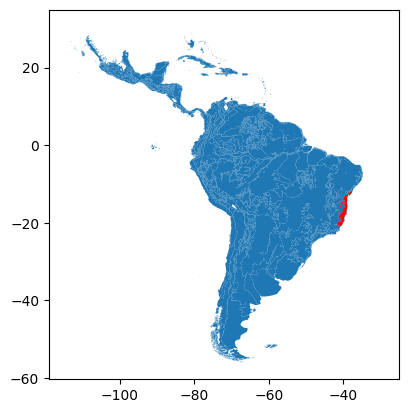

In [87]:
# Plot
fig, ax = plt.subplots()
ecoregions_exp.plot(ax=ax)
ecoregions_exp[ecoregions_exp['ECO_NAME'] == 'Bahia coastal forests'].plot(ax=ax,color='red')
plt.show()


In [22]:
# Read CSV with treecover loss %/year
forest_cover = pd.read_csv('inputs/04_csv/Forest_PrimaryLoss_Per_Year_Stats_50_v2.csv')
forest_cover = forest_cover.drop(['.geo', 'system:index'], axis=1)

forest_cover.dtypes

BIOME_NAME                      object
BIOME_NUM                      float64
COLOR                           object
COLOR_BIO                       object
COLOR_NNH                       object
ECO_BIOME_                      object
ECO_ID                           int64
ECO_NAME                        object
LICENSE                         object
Loss_Per_Year_%                float64
NNH                              int64
NNH_NAME                        object
OBJECTID                       float64
PrimaryForestArea_50           float64
REALM                           object
SHAPE_AREA                     float64
SHAPE_LENG                     float64
Total_PrimaryLoss_2001_2023    float64
dtype: object

In [23]:

# Identify the common column
common_column = 'ECO_NAME'

# Merge the DataFrames based on the common column
# Select only the two additional columns from CSV
additional_columns = [col for col in forest_cover.columns if col not in ecoregions_exp.columns and col != common_column]
# Merge the DataFrame with the GeoDataFrame
ecoregions_exp = ecoregions_exp.merge(forest_cover[[common_column] + additional_columns], on=common_column, how="left")
ecoregions_exp.dtypes


OBJECTID                                         float64
ECO_NAME                                          object
BIOME_NUM                                        float64
BIOME_NAME                                        object
REALM                                             object
ECO_BIOME_                                        object
NNH                                                int64
ECO_ID                                             int64
SHAPE_LENG                                       float64
SHAPE_AREA                                       float64
NNH_NAME                                          object
COLOR                                             object
COLOR_BIO                                         object
COLOR_NNH                                         object
LICENSE                                           object
ZonalStat_Ecoregions_EWM_nino_EWMnina_median     float64
ZonalStat_Ecoregions_EWM_nino_EWMnino_median     float64
geometry                       

## Fires treecover 50

In [24]:
# Read CSV with fires
df_fires_50 = pd.read_csv('inputs/04_csv/PrimaryLoss_by_Fires_Stats_50_v3.csv')
df_fires_50 = df_fires_50.drop(['.geo', 'system:index'], axis=1)
df_fires_50.dtypes

BIOME_NAME                 object
BIOME_NUM                 float64
COLOR                      object
COLOR_BIO                  object
COLOR_NNH                  object
ECO_BIOME_                 object
ECO_ID                      int64
ECO_NAME                   object
LICENSE                    object
Loss_Fires_50%            float64
NNH                         int64
NNH_NAME                   object
OBJECTID                  float64
PrimaryLoss_by_fires50    float64
Primary_loss50            float64
REALM                      object
SHAPE_AREA                float64
SHAPE_LENG                float64
dtype: object

In [25]:
df_fires_50 = df_fires_50.rename(columns={'PrimaryForestArea_50': 'Treecover_loss50', 'Total_PrimaryLoss_2001_2023': 'Loss_by_fires50'})
df_fires_50.dtypes

BIOME_NAME                 object
BIOME_NUM                 float64
COLOR                      object
COLOR_BIO                  object
COLOR_NNH                  object
ECO_BIOME_                 object
ECO_ID                      int64
ECO_NAME                   object
LICENSE                    object
Loss_Fires_50%            float64
NNH                         int64
NNH_NAME                   object
OBJECTID                  float64
PrimaryLoss_by_fires50    float64
Primary_loss50            float64
REALM                      object
SHAPE_AREA                float64
SHAPE_LENG                float64
dtype: object

In [26]:
# Identify the common column
common_column = 'ECO_NAME'

# Merge the DataFrames based on the common column
# Select only the two additional columns from CSV
additional_columns = [col for col in df_fires_50.columns if col not in ecoregions_exp.columns and col != common_column]
# Merge the DataFrame with the GeoDataFrame
ecoregions_exp = ecoregions_exp.merge(df_fires_50[[common_column] + additional_columns], on=common_column, how="left")
ecoregions_exp.dtypes

OBJECTID                                         float64
ECO_NAME                                          object
BIOME_NUM                                        float64
BIOME_NAME                                        object
REALM                                             object
ECO_BIOME_                                        object
NNH                                                int64
ECO_ID                                             int64
SHAPE_LENG                                       float64
SHAPE_AREA                                       float64
NNH_NAME                                          object
COLOR                                             object
COLOR_BIO                                         object
COLOR_NNH                                         object
LICENSE                                           object
ZonalStat_Ecoregions_EWM_nino_EWMnina_median     float64
ZonalStat_Ecoregions_EWM_nino_EWMnino_median     float64
geometry                       

In [ ]:
ecoregions_exp['velocity'] = (ecoregions_exp['Primary_loss50']/(ecoregions_exp['PrimaryForestArea_50']*23))*100

In [30]:
# Save the updated GeoDataFrame to a new geopackage
ecoregions_exp.to_file('outputs/geopackages/ZonalStat_Ecoregions_EWM_v2.gpkg', driver='GPKG', layer='zonal_statistics_v2')

## PCA

In [31]:
ecoregions_exp.dtypes

OBJECTID                                         float64
ECO_NAME                                          object
BIOME_NUM                                        float64
BIOME_NAME                                        object
REALM                                             object
ECO_BIOME_                                        object
NNH                                                int64
ECO_ID                                             int64
SHAPE_LENG                                       float64
SHAPE_AREA                                       float64
NNH_NAME                                          object
COLOR                                             object
COLOR_BIO                                         object
COLOR_NNH                                         object
LICENSE                                           object
ZonalStat_Ecoregions_EWM_nino_EWMnina_median     float64
ZonalStat_Ecoregions_EWM_nino_EWMnino_median     float64
geometry                       

In [59]:
ecoregions_exp = ecoregions_exp.rename(columns={
    "ZonalStat_Ecoregions_EWM_nino_EWMnina_median": "EWMnina", 
    "ZonalStat_Ecoregions_EWM_nino_EWMnino_median": "EWMnino",
    "Loss_Fires_50%": "Loss_fires"
    })

ecoregions_exp.dtypes

OBJECTID                        float64
ECO_NAME                         object
BIOME_NUM                       float64
BIOME_NAME                       object
REALM                            object
ECO_BIOME_                       object
NNH                               int64
ECO_ID                            int64
SHAPE_LENG                      float64
SHAPE_AREA                      float64
NNH_NAME                         object
COLOR                            object
COLOR_BIO                        object
COLOR_NNH                        object
LICENSE                          object
EWMnina                         float64
EWMnino                         float64
geometry                       geometry
Loss_Per_Year_%                 float64
PrimaryForestArea_50            float64
Total_PrimaryLoss_2001_2023     float64
Loss_fires                      float64
PrimaryLoss_by_fires50          float64
Primary_loss50                  float64
velocity                        float64


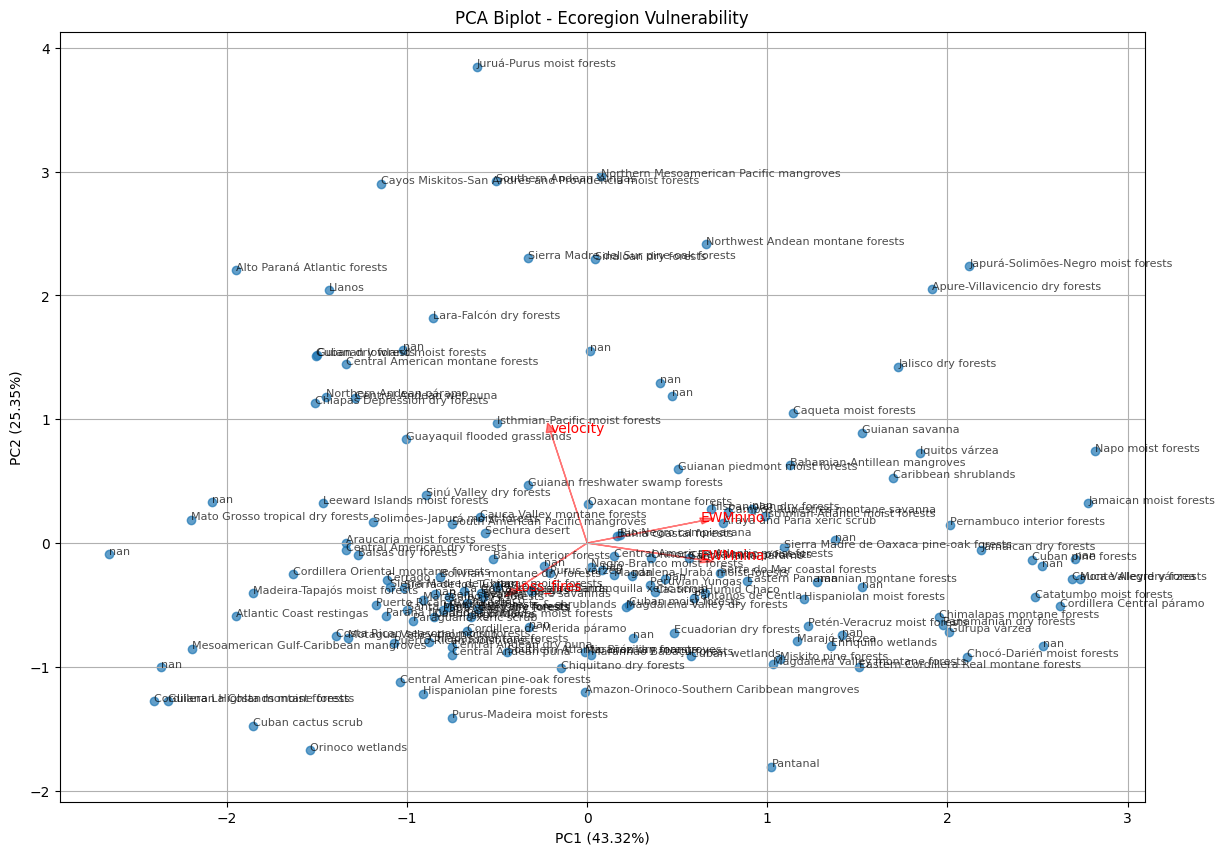

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select the columns for PCA
features = ["EWMnino", "EWMnina", "velocity", "Loss_fires"]
gdf_selected = ecoregions_exp[["ECO_NAME"] + features].dropna()  # Drop missing values

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(gdf_selected[features])

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Convert to DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=["PC1", "PC2"])
pca_df["Ecoregion"] = gdf_selected["ECO_NAME"]

# Compute explained variance percentages
explained_variance = pca.explained_variance_ratio_ * 100  # Convert to percentage

# Plot PCA Biplot
fig, ax = plt.subplots(figsize=(14, 10))

# Scatter plot of ecoregions
ax.scatter(pca_df["PC1"], pca_df["PC2"], alpha=0.7, label="Ecoregions")

# Annotate ecoregions with labels
for i, txt in enumerate(pca_df["Ecoregion"]):
    ax.annotate(txt, (pca_df["PC1"][i], pca_df["PC2"][i]), fontsize=8, alpha=0.7)

# Add PCA component vectors
components = pca.components_.T
for i, feature in enumerate(features):
    ax.arrow(0, 0, components[i, 0], components[i, 1], color="r", alpha=0.5, head_width=0.05)
    ax.text(components[i, 0], components[i, 1], feature, color="r", fontsize=10)

# Update axis labels with variance percentage
ax.set_xlabel(f"PC1 ({explained_variance[0]:.2f}%)")
ax.set_ylabel(f"PC2 ({explained_variance[1]:.2f}%)")
ax.set_title("PCA Biplot - Ecoregion Vulnerability")
# ax.set_xlabel("PC1")
# ax.set_ylabel("PC2")
ax.set_title("PCA Biplot - Ecoregion Vulnerability")
plt.grid()
plt.show()


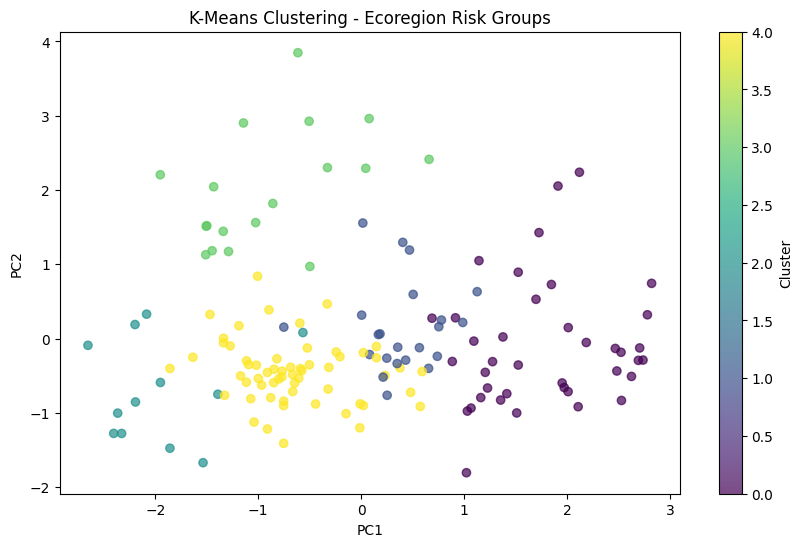

In [80]:
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
gdf_selected["Cluster"] = kmeans.fit_predict(scaled_data)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df["PC1"], pca_df["PC2"], c=gdf_selected["Cluster"], cmap="viridis", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-Means Clustering - Ecoregion Risk Groups")
plt.colorbar(label="Cluster")
plt.show()
